In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.model_selection import ShuffleSplit,GridSearchCV,train_test_split,cross_val_score

In [2]:
df=pd.read_csv("HR_comma_sep.csv", encoding = 'utf-8')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
sal={
    'high':3,
    'medium':2,
    'low':1
}

df['num_salary']=df.salary.apply(lambda x: sal[x])

Moving target feature 'left' to last and lowercasing column name for easiness

In [5]:
cols=df.columns.tolist()
cols.insert(len(cols),cols.pop(cols.index('left')))
df=df[cols]
df.columns=[x.lower() for x in cols]

In [6]:
df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,department,salary,num_salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,0,sales,medium,2,1


In [7]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
num_salary                 int64
left                       int64
dtype: object

In [8]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,num_salary,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,1.594706,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.637183,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,1.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,2.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,3.000000,1.000000


## Cleaning of data

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
department               0
salary                   0
num_salary               0
left                     0
dtype: int64

NO missing values we can proceed

checking for duplicates

In [10]:
print('no of duplicates: ',len(df[df.duplicated()]))
df.drop_duplicates(inplace=True)

no of duplicates:  3008


## DATA VISUALISATION AND ANALYSIS

Analysis of catogorical features

In [11]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,num_salary
left,,,,,,,,
0,0.667365,0.715667,3.786800,198.94270,3.262000,0.174500,0.019500,1.637600
1,0.440271,0.721783,3.883476,208.16223,3.881467,0.052737,0.004018,1.434455


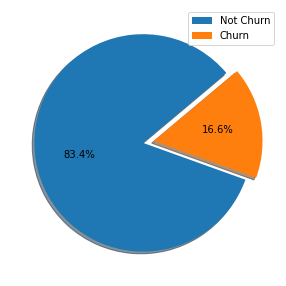

In [12]:
plt.figure(figsize=(6,5))
plt.pie(df.left.value_counts(),explode=[0,0.1],startangle=40,autopct='%1.1f%%',shadow=True)
plt.legend(labels=['Not Churn','Churn'],loc='upper right')
plt.show()

No of employees noleft and left are no in same number it is a imbalanced dataset

####  SALARY

<AxesSubplot:xlabel='salary', ylabel='count'>

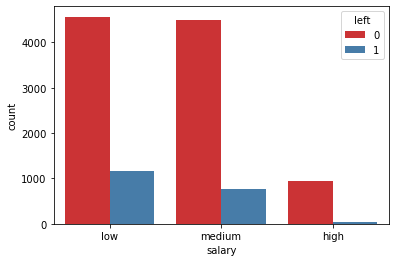

In [13]:
sns.countplot(x='salary',hue='left',palette='Set1',data=df)

####  DEPARTMENT

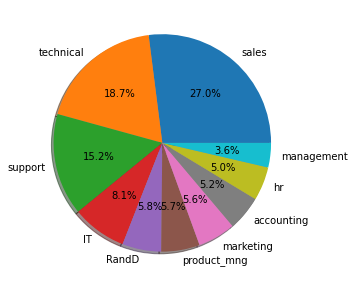

In [14]:
plt.figure(figsize=(6,5))
d=df.department.value_counts()
plt.pie(d.values,labels=d.index,autopct='%1.1f%%',shadow=True)
plt.show()

<AxesSubplot:xlabel='department', ylabel='count'>

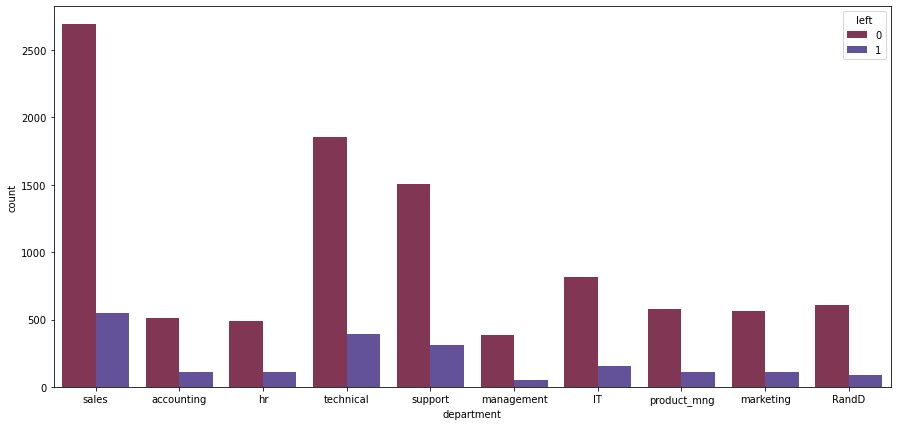

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(x='department',hue='left',palette='twilight_r',data=df)

Sales department has highest no of employees and management has lowest no

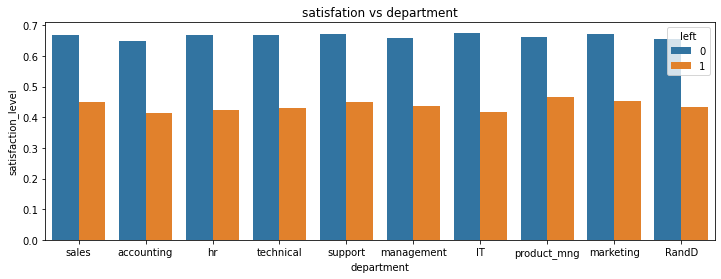

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(x='department',y='satisfaction_level',hue='left',data=df,ci=None)
plt.title('satisfation vs department')
plt.show()

Observations:

. max no of employees is in sales department

. management department has least no of employees

. no observable relationship b/w department and employee churn

. employees with satisfaction-level less than 0.44 in all the department left the company

Lets analyse using heatmap

<AxesSubplot:>

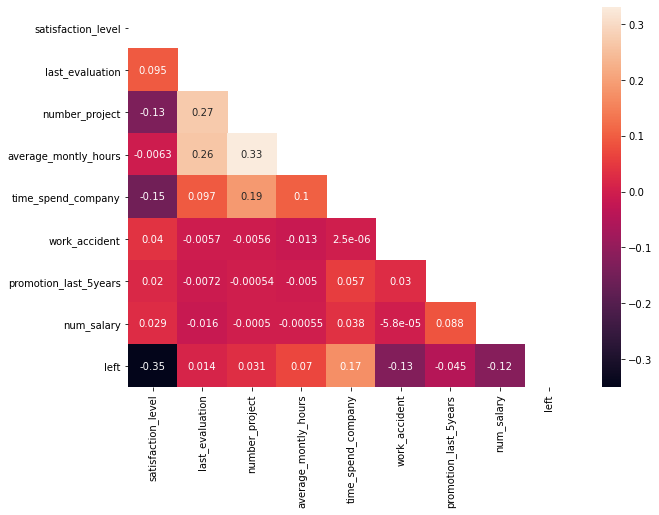

In [17]:
plt.figure(figsize=(10,7))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(),annot=True,mask=mask)

Observations:
  1. there are no strong *multicollinearity* b/w any features  
  2. There is no strong correlation b/w any feature and target(left)

<AxesSubplot:>

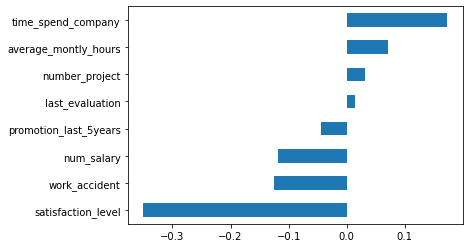

In [18]:
df.corr().left.sort_values()[:-1].plot.barh()

satisfactory level has highest  -ve correlation value with target variable

We shall examine the effect of all factors individually

<AxesSubplot:xlabel='satisfaction_level', ylabel='Count'>

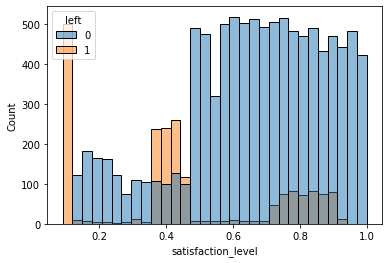

In [19]:
sns.histplot(data=df,x='satisfaction_level',hue='left')

<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

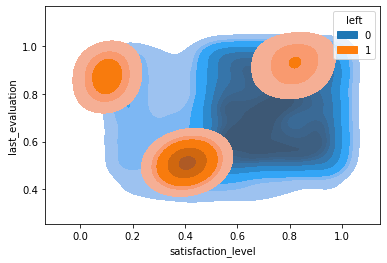

In [20]:
sns.kdeplot(data=df,x='satisfaction_level',y='last_evaluation',hue='left',shade=True)

employees who left company can be distributed into 3 category
  1. hardworking and unhappy
  2. hardworking and happy
  3. not hardworking and not that happy

 Promotion

<AxesSubplot:xlabel='promotion_last_5years'>

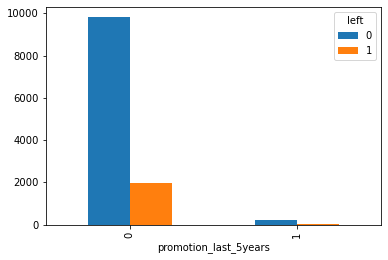

In [21]:
pd.crosstab(df.promotion_last_5years,df.left).plot(kind='bar')

In [22]:
df[df.left==1].promotion_last_5years.value_counts(sort=False)

0    1983
1       8
Name: promotion_last_5years, dtype: int64

almost all the employee left did not get promotion 

but we can also see that getting promotion in this company is also a rare case

4.average_montly_hours

<AxesSubplot:xlabel='average_montly_hours', ylabel='Density'>

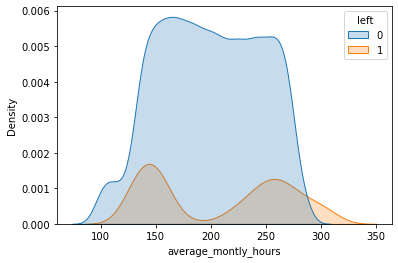

In [23]:
sns.kdeplot(data=df,x='average_montly_hours',hue='left',shade=True)

almost all the employees who worked for more than 290 hours left this company

<AxesSubplot:xlabel='number_project', ylabel='count'>

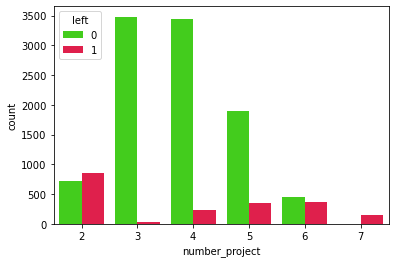

In [24]:
sns.countplot(x='number_project',data=df,hue='left',palette='prism')

In [25]:
df[df.number_project==7].describe(percentiles=[])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,num_salary,left
count,145.000000,145.000000,145.0,145.000000,145.000000,145.000000,145.0,145.000000,145.0
mean,0.116690,0.863517,7.0,275.620690,4.110345,0.013793,0.0,1.448276,1.0
std,0.074806,0.097322,0.0,27.596817,0.426830,0.117036,0.0,0.526137,0.0
min,0.090000,0.460000,7.0,133.000000,2.000000,0.000000,0.0,1.000000,1.0
50%,0.100000,0.880000,7.0,281.000000,4.000000,0.000000,0.0,1.000000,1.0
max,0.660000,0.970000,7.0,310.000000,5.000000,1.000000,0.0,3.000000,1.0


<AxesSubplot:xlabel='salary', ylabel='count'>

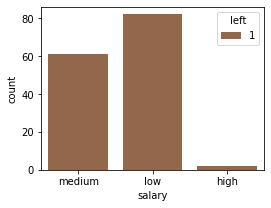

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(x='salary',hue='left',palette='copper',data=df[df.number_project==7])

for employees who worked on 7 projects there is no promotion and salary of most of them is also
less they are also have more work hour these employees are hardworking but without proper returns 
hence they are leaving this company

we can also see employees worked only on 2 projects are also more likely to leave

 time_spend_company

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

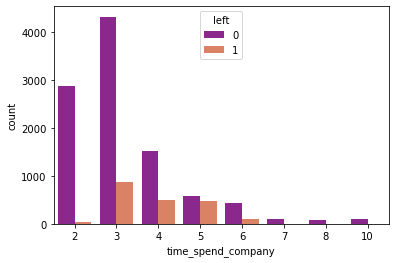

In [27]:
sns.countplot(x='time_spend_company',hue='left',palette='plasma',data=df)

 * employees who worked in comapany for more than 6 years shows least tendency to leave the company
 * company have majority of people with 3Years of experience and at 3rd year most employees tend to leave

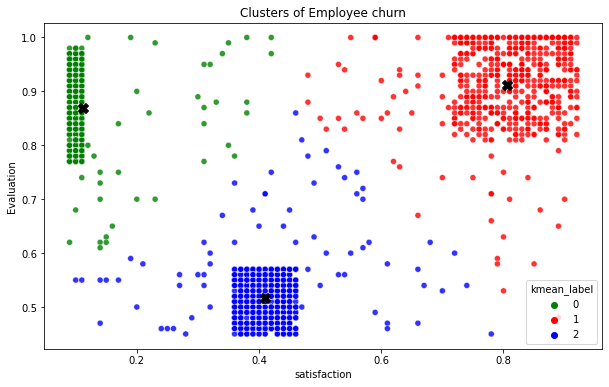

In [28]:
from sklearn.cluster import KMeans
df1=df[df.left==1].copy()
kmeans = KMeans(n_clusters=3,random_state=2)
df1['kmean_label']=kmeans.fit_predict(df1[["satisfaction_level","last_evaluation"]])

fig = plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level',y='last_evaluation',data=df1,
                hue='kmean_label',palette=['g','r','b'],alpha=0.8)
plt.scatter(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],
            color="black",marker="X",s=100)
plt.xlabel("satisfaction")
plt.ylabel("Evaluation")
plt.title("Clusters of Employee churn")
plt.show()

In [29]:
df1.groupby('kmean_label').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,num_salary,left
kmean_label,,,,,,,,,
0,0.111199,0.869064,6.119850,271.840824,4.084270,0.052434,0.001873,1.434457,1.0
1,0.805874,0.912577,4.511712,242.003604,5.012613,0.052252,0.003604,1.430631,1.0
2,0.410133,0.517195,2.172949,149.640798,3.065410,0.053215,0.005543,1.436807,1.0


### ANALYSIS REPORT

We can broadly classify churn employees into 3 categories


* Cluster 0 >> hardworking and not_satisfied:
        1. more work hour (271)
        2. more experience (avg 6 projects , 4 year)
    + churn reason:
        1. low salary they expect higher salary as they work for more hours
        2. very low promotion rate
  
  
* Cluster 1 >> hardworking and satisfied:
        1. more work hour (249)
        2. more experience (avg 4 projects , 5 year)
    + churn reason:
        1. lower salary
        2. very low promotion rate
        3. as they have higher experience  they can find other company which offer more salary easily
   
   
* Cluster 2 >> not hardworking and not that saisfied:
        1. medium work hour (149)
        2. less experience (avg 2 projects , 3 year)
    + churn reason:
        1. lesser experience and less interest in their job
        
        
company should concern about first 2 cluster (0,1) employees since they are more productive people
they may be retained by giving higher salary and promotions

but its wierd to see mean value of promotion is exatly in opposite order than what we expect

## DATA PREPROCESSING

dropping unnessesary column

In [30]:
processed_df=df.drop(['left','work_accident','department','salary'],axis=1)
processed_df.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,num_salary
0,0.38,0.53,2,157,3,0,1
1,0.80,0.86,5,262,6,0,2


Scaling data 

In [31]:
sc = StandardScaler()
X = sc.fit_transform(processed_df)

In [32]:
#target variable
y=df.left.values

## Model Building

I will use 3 ML model LogisticRegression, DecisionTree, RandomForest

lets find the best model using GridSearchCV

In [33]:
score=[]
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

shufflesplit is used since it is a imbalanced dataset

In [35]:
models_sales=[RandomForestClassifier(),DecisionTreeClassifier(),GradientBoostingClassifier()
            ,KNeighborsClassifier(n_neighbors=3),LogisticRegression(),GaussianNB()]

score_sales=[]
for model in models_sales:
    score_sales.append(cross_val_score(model,X,y,n_jobs=-1,cv=cv).mean())
pd.DataFrame(score_sales,index=models_sales).sort_values(by=0,ascending=False)

,0
RandomForestClassifier(),0.985244
GradientBoostingClassifier(),0.980659
KNeighborsClassifier(n_neighbors=3),0.972489
DecisionTreeClassifier(),0.969737
GaussianNB(),0.844935
LogisticRegression(),0.830679


In [36]:

model_params={
    'DecisionTreeClassifier':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_features':['sqrt',"log2"]
        }   
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_features':['sqrt',"log2"]
        } 
    } 
}

In [37]:
for name,model in model_params.items():
    clf=GridSearchCV(model['model'],model['params'],cv=cv,return_train_score=False)
    clf.fit(X,y)
    score.append({
        'model':name,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })
pd.DataFrame(score)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Progr

,model,best_score,best_params
0,DecisionTreeClassifier,0.970404,"{'criterion': 'entropy', 'max_features': 'auto'}"
1,RandomForestClassifier,0.985327,"{'criterion': 'gini', 'max_features': 'auto'}"


RandomForest ouperformed other with accuracy_score of 98.5 %  with parameters gini and auto

Logistic Regression performed worst with score 83%

lets analyse RandomForest model in detail

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [39]:
rfc=RandomForestClassifier(max_features='log2')
rfc.fit(X_train,y_train)
y_predicted=rfc.predict(X_test)
rfc.score(X_test,y_test)

0.9845769070446019

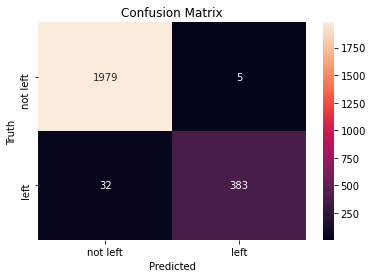

In [40]:
cm=confusion_matrix(y_test,y_predicted)
labels=['not left','left']
plt.title('Confusion Matrix')
sns.heatmap(cm,annot=True,fmt='g',xticklabels=labels,yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [41]:
print('--------RandomForestClassifier--------')
print(f'Acccuracy score  :  {rfc.score(X_test,y_test)}')
print(f'Precision score  :  {precision_score(y_test,y_predicted)}')
print(f'Recall           :  {recall_score(y_test,y_predicted)}')

--------RandomForestClassifier--------
Acccuracy score  :  0.9845769070446019
Precision score  :  0.9871134020618557
Recall           :  0.9228915662650602


### Conlusion
RandomForestClassifier fits best for this dataset with accuracy_score of 98.5 %

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1984
           1       0.99      0.92      0.95       415

    accuracy                           0.98      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399

